In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, model_selection, preprocessing, datasets
from matplotlib.colors import ListedColormap

In [2]:
X, y = datasets.make_classification(n_samples=100, 
                                    n_features=2, 
                                    n_redundant=0, # 冗余特征的个数 
                                    n_informative=2, # 包含的信息特征0个
                                    random_state=30, 
                                    n_clusters_per_class=1 # 每个簇包含的标签类别有1个
                                   )

In [8]:
pd.DataFrame(X).head()

,0,1
0,-1.568188,0.833720
1,-0.359052,-0.443802
2,-0.847848,3.821559
3,-0.063649,-0.296111
4,-0.453137,-0.308114


In [9]:
X.shape

(100, 2)

In [15]:
y_df = pd.Series(y)
# 查看标签数量分布
y_df.value_counts()

1    50
0    50
dtype: int64

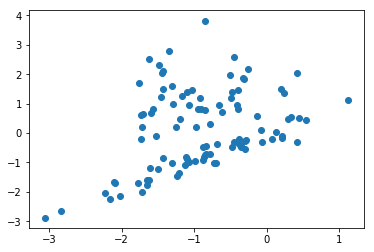

In [16]:
# 查看数据的大致分布
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [17]:
# 由上图可以看出，生成的二分类数据类型的两个簇彼此很远，这样不利于测试分类器的效果，因此我们使用np生成随机数组，
# 通过让已经生成二分型数据点加减0~1之间的随机数，使数据变得更散更稀疏
rng = np.random.RandomState(6)
X += 2 * rng.uniform(size=X.shape)
linear_separable = (X, y)

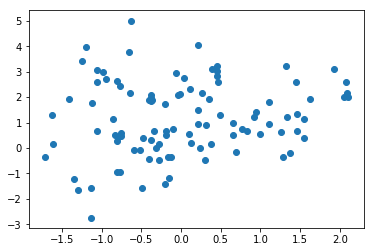

In [18]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [19]:
datases_arr = [datasets.make_moons(noise=0.3, random_state=66),
               datasets.make_circles(noise=0.2, factor=0.5, random_state=88),
               linear_separable
              ]

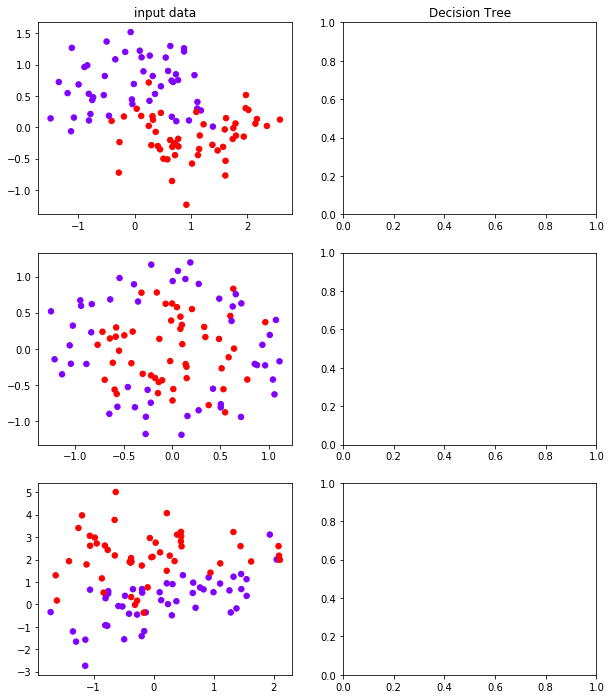

In [26]:
# 画出三种数据集和三种决策树在分类效应的图像
titles = ['input data', 'Decision Tree']
nrows = len(datases_arr)
ncols = len(titles)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 12))
for i_index, (X, y) in enumerate(datases_arr):
    ax = axes[i_index, 0]
    ax.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap='rainbow')
    clf = tree.DecisionTreeClassifier()
    for j_index, title in enumerate(titles):
        ax = axes[i_index, j_index]
        if i_index == 0:
            ax.set_title(title)
            continue
        
        
plt.show()
    

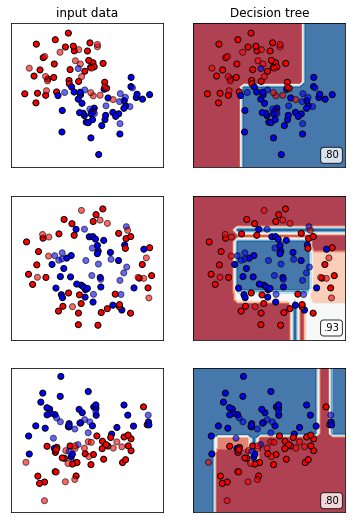

In [67]:
figure = plt.figure(figsize=(6, 9))
i = 1
for i_index, (X, y) in enumerate(datases_arr):
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)
    # 找出数据集中最大值和最小值 构造区间
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # 构造网格点
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))
    
    # 接下来生成彩色画布
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # 生成一个3行2列 在i上的坐标系
    ax = plt.subplot(len(datases_arr), 2, i)
    
    if i_index ==0:
        ax.set_title('input data')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i = i +1
    
    # 接下来是创建模型，训练数据
    ax = plt.subplot(len(datases_arr), 2, i)
    clf = tree.DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    # 预测出来的概率 取其中任意一列都可以
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # 设置标题
    if i_index == 0:
        ax.set_title('Decision tree')
    
    # 把预测概率写到右下角数字
    ax.text(0.96, 0.06, 
            ('%.2f' % score).lstrip('0'), 
            transform=ax.transAxes, 
            horizontalalignment='right',
            bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
           )
    i += 1
    
    
plt.show()
    

In [28]:
# x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
# x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(1, 3, 0.2), np.arange(1, 4, 0.2))
xx

array([[1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8],
       [1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8]])

In [29]:
yy

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4],
       [1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6],
       [1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8],
       [2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ],
       [2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2],
       [2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4],
       [2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6],
       [2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8],
       [3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ],
       [3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2],
       [3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4],
       [3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6],
       [3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8]])

In [40]:
# np.vstack(0)
xx.shape

(15, 10)

In [53]:
np.c_[xx.ravel(), yy.ravel()]

array([[-2.34684513, -3.20010009],
       [-2.14684513, -3.20010009],
       [-1.94684513, -3.20010009],
       ...,
       [ 2.25315487,  2.99989991],
       [ 2.45315487,  2.99989991],
       [ 2.65315487,  2.99989991]])

In [55]:
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([[1, 4],
       [2, 5],
       [3, 6]])